## Procesamiento  y Clasificacion de datos 
 
 **Tarea 2**:   Tweets - Analisis de Sentimientos
 
 **Nombre**:   Cynthia Selene Martínez Espinoza.
 
 **Matricula**: 1011238
 
 **Fecha**: 23 de Enero del 2025.

## Carga de paquetes

In [10]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.8 MB 459.5 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 438.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 481.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 473.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 499.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 551.4 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 630.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.8 MB 676.8 kB/s eta 0:00:03
   -------- ----------

In [13]:
pip install --force-reinstall tweepy

  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.0.4
    Uninstalling charset-normalizer-2.0.4:
      Successfully uninstalled charset-normalizer-2.0.4
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
botocore 1.31.64 requires urllib3<2.1,>=1.25.4; python_version >= "3.10", but you have urllib3 2.3.0 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [16]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Carga de librerias

In [1]:
# Conexión a Twitter
# Se importa la librería tweepy
import tweepy
# Se importa sleep, datetime, TextBlob y matplotlib
from time import sleep
from datetime import datetime
from textblob import TextBlob
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
tokenizer=RegexpTokenizer(r'\w+')
ps=PorterStemmer()
en_stop=set(stopwords.words('english'))

##  1. **Cargar los datos:**
   - Importar los datos desde el archivo `covid-19_vaccine_tweets_with_sentiment.csv`. 

In [3]:
# Ruta del archivo 
file_path = "C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 2/covid-19_vaccine_tweets_with_sentiment.csv"
# Intenta con distintas codificaciones
data = pd.read_csv(file_path, encoding='latin-1')  # O prueba 'ISO-8859-1', 'utf-8', etc.

In [4]:
print(data)

          tweet_id  label                                         tweet_text
0     1.360342e+18      1  4,000 a day dying from the so called Covid-19 ...
1     1.382896e+18      2  Pranam message for today manifested in Dhyan b...
2     1.375673e+18      2  Hyderabad-based ?@BharatBiotech? has sought fu...
3     1.381311e+18      1  Confirmation that Chinese #vaccines "dont hav...
4     1.362166e+18      3  Lab studies suggest #Pfizer, #Moderna vaccines...
...            ...    ...                                                ...
5995  1.370975e+18      2  @Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996  1.379827e+18      3  So happy to be fully vaccinated against COVID-...
5997  1.384789e+18      2  Serum Institute of India announces cost of Cov...
5998  1.382355e+18      1  @___batshitcrazy @BarrowfordHead @Bectully I h...
5999  1.380051e+18      2  The smart sympathy attends into the oblong not...

[6000 rows x 3 columns]


## Preparacion y  limpieza de datos


**stopwords:** Palabras comunes que no aportan significado (por ejemplo, "the", "and").

**RegexpTokenizer:** Divide texto en palabras, eliminando caracteres no alfabéticos.

**PorterStemmer:** Reduce palabras a su raíz para simplificar el análisis (por ejemplo, "running" → "run").

**Funcion de Limpieza:**

-Convierte todo a minúsculas.

-Tokeniza para separar palabras.

-Elimina palabras irrelevantes (stopwords).

-Aplica stemming para simplificar las palabras.

-Devuelve el texto limpio.

In [51]:
from nltk.corpus import stopwords

# Obtener la lista de stop words en inglés
en_stop = set(stopwords.words('english'))

# Palabras personalizadas para agregar a las stop words
custom_stopwords = {"covid", "vaccin", "covid19", "covid19vaccin","covidvaccin","pfizer","moderna","sputnikv","coronaviru","astrazeneca","co","covaxin",
                   "pfizerbiontech","oxfordastrazeneca","sinopharm", "covishield","sinopharm","pfizervaccin","spuntnik","sinovac"}

# Actualizar la lista de stop words con las palabras personalizadas
en_stop.update(custom_stopwords)

# Mostrar la lista actualizada
print("Stop words actualizadas (en inglés):", en_stop)


Stop words actualizadas (en inglés): {'covidvaccin', 'didn', 'during', 'won', 'coronaviru', 'me', 'nor', "weren't", 'covishield', 'moderna', 'been', 'hers', 'shouldn', 'yourself', 'to', 'each', "couldn't", 'below', "that'll", 'when', 'over', 'doing', 'do', 'after', 'we', 'the', 'am', 'by', 'or', 'through', 'o', 'ourselves', "you're", 'i', 'at', 'he', 'more', 'ours', 'wouldn', 'covid19', 'haven', 'that', 've', 'few', 'covaxin', 'of', 'off', 'who', 'all', "isn't", 'very', 'an', 'other', 'weren', 'once', 'again', 'his', 'under', 'then', "wasn't", 'having', 'hasn', 'has', 'your', 'being', 'now', 'not', 'pfizer', 'myself', 're', 'don', 'covid', 'its', 'our', 'yourselves', 'does', 'than', 'between', 'those', "needn't", 'pfizerbiontech', 'up', "mightn't", 'my', 'with', 'why', "aren't", 'him', 'doesn', "you'll", 'above', "should've", "mustn't", 'co', 'astrazeneca', 'both', 't', 'are', 'out', "you'd", 'how', 'as', 'should', 'while', 'aren', 'about', "won't", 'from', "hadn't", 'm', 'same', "didn

In [52]:
def getCleanedText(text):
    text = text.lower()
    tokens=tokenizer.tokenize(text)
    new_tokens=[token for token in tokens if token not in en_stop]
    stemmed_tokens=[ps.stem(tokens) for tokens in new_tokens]
    clean_text=" ".join(stemmed_tokens)
    return clean_text

#### Aplicamos la limpieza a los tweets

In [53]:
data['tweet_text']=data['tweet_text'].apply(getCleanedText)
# Muestra los primeros tweets después de ser limpiados
data['tweet_text'].head()

0    4 000 day die call 19 dailybeast report http p...
1    pranam messag today manifest dhyan meenapranam...
2    hyderabad base bharatbiotech sought fund gover...
3    confirm chine high protect rate accord directo...
4    lab studi suggest protect coronavirusvari http...
Name: tweet_text, dtype: object

### Subjetividad

Análisis de Opiniones:

Identificar si los comentarios o reseñas son objetivos o subjetivos.

Clasificación de Texto: Utilizar la subjetividad como una característica para clasificar textos en análisis de sentimiento o temas.

Detección de Sesgo:  Analizar textos de noticias para evaluar el nivel de subjetividad y detectar sesgos.

Subjetividad:

Mide qué tan subjetivo o basado en opiniones es el texto.
Valor cercano a 0: El texto es más objetivo (por ejemplo, "El cielo es azul").
Valor cercano a 1: El texto es más subjetivo (por ejemplo, "Me encanta este producto").

In [56]:
# Obtiene la puntuación de subjetividad del texto.
def getSubjectivity(tweet_text):   # Recibe un texto (tweet_text), como un tweet u otro fragmento de texto.
    return TextBlob(tweet_text).sentiment.subjectivity  #Devuelve el valor de la subjetividad del texto, que es un número entre 0 y 1.

### Polaridad

**Análisis de Sentimientos:** Determinar si el texto expresa un sentimiento positivo, negativo o neutral.
Ejemplo: Calificaciones de productos, opiniones de clientes, tweets.

**Clasificación de Textos:**  Utilizar la polaridad como una característica clave en algoritmos de machine learning.

**Tendencias de Opinión:** Analizar grandes volúmenes de texto (como tweets o reseñas) para obtener una visión general de las opiniones de los usuarios.

**Polaridad:**

Mide si el sentimiento del texto es negativo, neutro o positivo:
Valor cercano a -1: Sentimiento negativo (por ejemplo, "Esto es horrible").
Valor cercano a 0: Sentimiento neutral (por ejemplo, "Es un día").
Valor cercano a 1: Sentimiento positivo (por ejemplo, "Me encanta este lugar").

In [57]:
# Obtiene la puntuación de polaridad del texto.
def getPolarity(tweet_text): # Recibe un texto (tweet_text), como un tweet, comentario, o reseña.
    return TextBlob(tweet_text).sentiment.polarity #Devuelve un valor numérico que representa la polaridad del texto, que varía entre -1 y 1.

### Integracion de Subjetividad y polaridad a los datos

In [58]:
# Se agregan las columnas en el dataframe,  llamando funciones de subjetividad y polaridad 
data['Subjectivity'] = data['tweet_text'].apply(getSubjectivity) 
data['Polarity'] = data['tweet_text'].apply(getPolarity)

In [59]:
# Muestra las nuevas columnas en el dataframe
data

,tweet_id,label,tweet_text,Subjectivity,Polarity
0,1.360342e+18,1,4 000 day die call 19 dailybeast report http p...,0.000000,0.000000
1,1.382896e+18,2,pranam messag today manifest dhyan meenapranam...,0.650000,0.450000
2,1.375673e+18,2,hyderabad base bharatbiotech sought fund gover...,1.000000,-0.800000
3,1.381311e+18,1,confirm chine high protect rate accord directo...,0.313333,0.020000
4,1.362166e+18,3,lab studi suggest protect coronavirusvari http...,0.000000,0.000000
...,...,...,...,...,...
5995,1.370975e+18,2,swamy39 dr swamy39 jee mani peopl like get don...,0.000000,0.000000
5996,1.379827e+18,3,happi fulli 19 readi serv vaccineswork vaccine...,0.000000,0.000000
5997,1.384789e+18,2,serum institut india announc cost cost rs 400 ...,0.000000,0.000000
5998,1.382355e+18,1,___batshitcrazi barrowfordhead bectulli mine y...,0.000000,0.000000


## Generacion de Graficos

### Visualización de Frecuencia de Palabras:

Cada palabra en la nube tiene un tamaño proporcional a su frecuencia en el texto.
Las palabras más grandes aparecen con mayor frecuencia en los tweets.

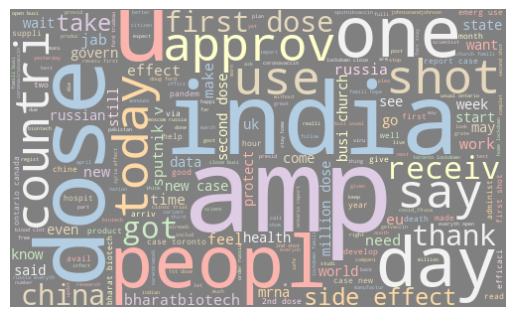

In [64]:
#Crea la nube de palabras basada en la frecuencia de las palabras en allWords.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar la nube de palabras con colores pastel
allWords = ''.join([twts for twts in data['tweet_text']])
wordCloud = WordCloud(
    width=500,
    height=300,
    random_state=21,
    max_font_size=119,
    colormap='Pastel1',  # Colores pastel
    background_color='gray'  # Fondo blanco
).generate(allWords)

# Mostrar la nube de palabras
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')


# Guardar la gráfica como PDF (alta calidad) o PNG
plt.savefig("C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 2/FrecuenciaPalabrasTweets.pdf", format='pdf')  # También puedes usar 'png'
plt.show()
plt.close()

### Clasifica la polaridad en un sentimiento

Recibe un valor de polaridad (score), que representa el análisis previo del sentimiento del texto.

La polaridad está en un rango de -1 a 1:

-1: Sentimiento extremadamente negativo.
    
 0: Sentimiento neutral.
    
 1: Sentimiento extremadamente positivo.

Retorna una etiqueta de sentimiento:

**'Negative'** si la polaridad es menor que 0.

**'Neutral'** si la polaridad es exactamente 0.

**'Positive'** si la polaridad es mayor que 0.


In [65]:
# crea una nueva columna en un DataFrame data que clasifica los valores de polaridad en análisis de sentimiento (positivo, negativo o neutral)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
data['Analysis'] = data['Polarity'].apply(getAnalysis)
data

,tweet_id,label,tweet_text,Subjectivity,Polarity,Analysis
0,1.360342e+18,1,4 000 day die call 19 dailybeast report http p...,0.000000,0.000000,Neutral
1,1.382896e+18,2,pranam messag today manifest dhyan meenapranam...,0.650000,0.450000,Positive
2,1.375673e+18,2,hyderabad base bharatbiotech sought fund gover...,1.000000,-0.800000,Negative
3,1.381311e+18,1,confirm chine high protect rate accord directo...,0.313333,0.020000,Positive
4,1.362166e+18,3,lab studi suggest protect coronavirusvari http...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
5995,1.370975e+18,2,swamy39 dr swamy39 jee mani peopl like get don...,0.000000,0.000000,Neutral
5996,1.379827e+18,3,happi fulli 19 readi serv vaccineswork vaccine...,0.000000,0.000000,Neutral
5997,1.384789e+18,2,serum institut india announc cost cost rs 400 ...,0.000000,0.000000,Neutral
5998,1.382355e+18,1,___batshitcrazi barrowfordhead bectulli mine y...,0.000000,0.000000,Neutral


### Gráfico de dispersión la relación entre la polaridad y la subjetividad

Cada punto en el gráfico representa un texto analizado, y su posición depende de los valores de polaridad y subjetividad asociados.

Eje X (Polaridad): Mide el sentimiento.

Izquierda (-1): Negativo.

Centro (0): Neutro.

Derecha (1): Positivo.

Eje Y (Subjetividad): Mide la subjetividad.

Inferior (0): Objetivo (hechos).

Superior (1): Subjetivo (opiniones).


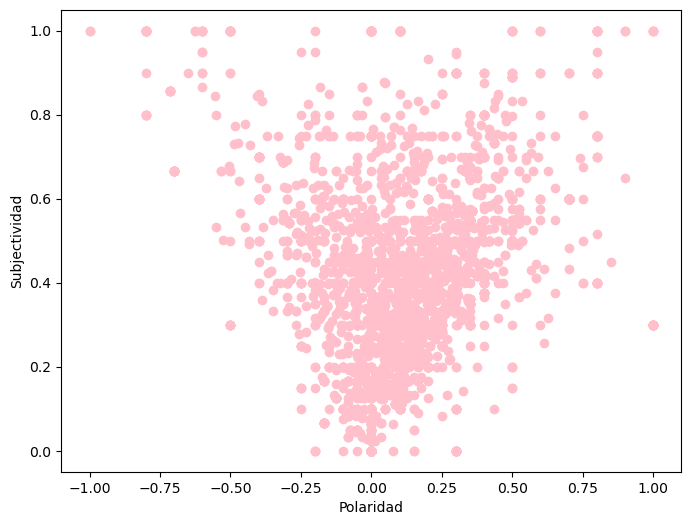

In [62]:
# Gráfico de dispersión la relación entre la polaridad y la subjetividad
plt.figure(figsize = (8,6))
for i in range(0,data.shape[0]):
    plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color = 'Pink')
# plt.title('Sentiment Analysis')
plt.xlabel('Polaridad')
plt.ylabel('Subjectividad')


# Guardar la gráfica como PDF (alta calidad) o PNG
plt.savefig("C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 2/DispersionPolaridadSubjetividad.pdf", format='pdf')  # También puedes usar 'png'
plt.show()
plt.close()

Calcula el porcentaje de tweets positivos en el DataFrame data basado en la columna Analysis, que clasifica los tweets como 'Positive', 'Negative', o 'Neutral'.

In [66]:
# Porcentaje y valores absolutos
pos_tweets = data[data.Analysis == 'Positive']
pos_tweets = pos_tweets['tweet_text']
pos_count = pos_tweets.shape[0]
total_count = data.shape[0]
pos_percentage = round((pos_count / total_count) * 100, 2)

# Mostrar etiqueta con valores absolutos
print(f"De un total de {total_count} tweets, {pos_count} son positivos, lo que representa el {pos_percentage}%.")


De un total de 6000 tweets, 2235 son positivos, lo que representa el 37.25%.


In [67]:
# Porcentaje y valores absolutos
pos_tweets = data[data.Analysis == 'Negative']
pos_tweets = pos_tweets['tweet_text']
pos_count = pos_tweets.shape[0]
total_count = data.shape[0]
pos_percentage = round((pos_count / total_count) * 100, 2)

# Mostrar etiqueta con valores absolutos
print(f"De un total de {total_count} tweets, {pos_count} son negativos, lo que representa el {pos_percentage}%.")

De un total de 6000 tweets, 822 son negativos, lo que representa el 13.7%.


In [69]:
# Porcentaje y valores absolutos
pos_tweets = data[data.Analysis == 'Neutral']
pos_tweets = pos_tweets['tweet_text']
pos_count = pos_tweets.shape[0]
total_count = data.shape[0]
pos_percentage = round((pos_count / total_count) * 100, 2)

# Mostrar etiqueta con valores absolutos
print(f"De un total de {total_count} tweets, {pos_count} son neutrales, lo que representa el {pos_percentage}%.")

De un total de 6000 tweets, 2943 son neutrales, lo que representa el 49.05%.


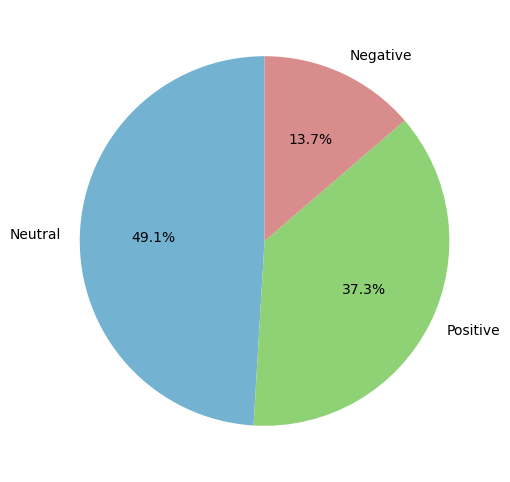

In [75]:
import matplotlib.pyplot as plt

# Definir colores personalizados para cada categoría
color_mapping = {
    'Positive': '#8fd175',  # Verde pastel
    'Neutral': '#73b3d1',   # Azul claro
    'Negative': '#d98c8c'   # Rojo suave
}

# Obtener los conteos de cada categoría
counts = data['Analysis'].value_counts()

# Aplicar colores según las etiquetas
colors = [color_mapping[label] for label in counts.index]

# Crear la gráfica de pastel
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Configurar el título
#plt.title('Distribución de Análisis de Sentimientos')

# Guardar la gráfica como PDF o PNG
plt.savefig("C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 2/AnalisisTweetsPie.pdf", format='pdf')

# Mostrar la gráfica
plt.show()
plt.close()




**Clasificación de Sentimientos:** Predecir si un tweet es positivo, negativo o neutral.

**Análisis de Opinión:** Clasificar comentarios de clientes.

**Optimización del Modelo:** Ajustar hiperparámetros de RandomForestClassifier para mejorar la precisión.

####  Random Forest es un Algoritmo Robusto y Versátil

**Basado en Árboles de Decisión:**

Random Forest combina múltiples árboles de decisión para realizar predicciones.
Cada árbol aporta un voto y el modelo final toma la decisión basada en la mayoría.
Reducción del Sobreajuste:

Los árboles de decisión individuales tienden a sobreajustarse a los datos.
Random Forest utiliza múltiples árboles y los promedia, reduciendo significativamente el sobreajuste.

**Manejo de Datos de Texto:**  
En el contexto de clasificación de texto, como el análisis de sentimientos:

Datos de Texto Convertidos a Números:
Se utiliza CountVectorizer para transformar el texto en una representación numérica.
Random Forest maneja bien este tipo de datos, evaluando qué características (palabras o bigramas) son más importantes para la clasificación.

**Tolerancia a Datos Ruidosos y Desequilibrados** 

Resistente al Ruido:

Random Forest es menos sensible a datos ruidosos, ya que la predicción final es un promedio de múltiples árboles.
Manejo de Desequilibrio:

Funciona bien incluso si las clases están ligeramente desequilibradas, ya que puede ponderar las decisiones de los árboles.

**Capacidad de Generalización**
    
Random Forest tiende a generalizar bien en problemas de clasificación binaria y multiclase, lo que lo hace ideal para clasificar sentimientos (por ejemplo, Positive, Neutral, Negative).


**Interpretabilidad**

Aunque no es tan interpretable como un árbol único, ofrece:
    
Importancia de las Características:
Puedes determinar qué palabras o bigramas tienen mayor impacto en la clasificación.
Esto es útil para análisis de sentimientos, ya que ayuda a identificar las palabras clave asociadas con sentimientos positivos o negativo

**Hiperparámetros Ajustables** 
    
Random Forest tiene varios hiperparámetros que pueden ajustarse para mejorar el rendimiento:
n_estimators: Número de árboles en el bosque.
max_depth: Profundidad máxima de los árboles.
max_features: Número de características consideradas en cada división.
class_weight: Maneja datos desequilibrados asignando pesos a cada clase.

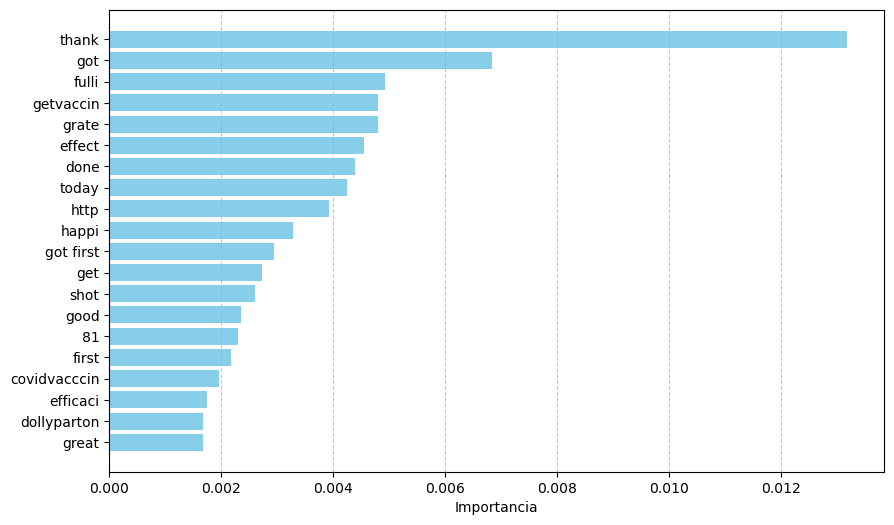

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np


cv = CountVectorizer(ngram_range=(1, 2))
X_cv = cv.fit_transform(data['tweet_text']).toarray()
X = X_cv
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
RF = RandomForestClassifier()
RF_model = RF.fit(X_train, y_train)


# Obtener los nombres de las características
feature_names = cv.get_feature_names_out()

# Obtener las importancias de las características del modelo
importances = RF_model.feature_importances_

# Seleccionar las 20 características más importantes
top_n = 20
indices = np.argsort(importances)[-top_n:]  # Índices de las características más relevantes

# Graficar las características más relevantes
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importancia')
#plt.title(f'Top {top_n} Características más Relevantes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Guardar la gráfica como PDF o PNG
plt.savefig("C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 2/CaracterísticasRelevantes.pdf", format='pdf')

# Mostrar la gráfica
plt.show()
plt.close()

In [79]:
print("Precisión de Entrenamiento",RF_model.score(X_train,y_train))
print("Precisión de Prueba",RF_model.score(X_test,y_test))

Precisión de Entrenamiento 0.999375
Precisión de Prueba 0.7158333333333333
